In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# we load the database
df=pd.read_csv('BreastCancerData.xls')

In [36]:
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892
567,1,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.006185


In [38]:
# we allocate values to X and y 
X=df.iloc[:, 1: ].values
y=df.iloc[:, 0].values

In [40]:
X

array([[1.799e+01, 1.038e+01, 1.184e-01, ..., 4.904e-02, 3.003e-02,
        6.193e-03],
       [2.057e+01, 1.777e+01, 8.474e-02, ..., 1.308e-02, 1.389e-02,
        3.532e-03],
       [1.969e+01, 2.125e+01, 1.096e-01, ..., 4.006e-02, 2.250e-02,
        4.571e-03],
       ...,
       [1.660e+01, 2.808e+01, 8.455e-02, ..., 3.731e-02, 1.318e-02,
        3.892e-03],
       [2.060e+01, 2.933e+01, 1.178e-01, ..., 6.158e-02, 2.324e-02,
        6.185e-03],
       [7.760e+00, 2.454e+01, 5.263e-02, ..., 4.660e-03, 2.676e-02,
        2.783e-03]])

In [42]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
# we split the data into training and testing data 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 2)

In [48]:
X_train

array([[1.080e+01, 9.710e+00, 9.594e-02, ..., 9.816e-03, 1.254e-02,
        2.120e-03],
       [1.328e+01, 1.372e+01, 8.363e-02, ..., 2.073e-02, 1.461e-02,
        2.613e-03],
       [1.459e+01, 2.268e+01, 8.473e-02, ..., 4.639e-02, 1.638e-02,
        4.406e-03],
       ...,
       [1.246e+01, 1.283e+01, 7.372e-02, ..., 1.003e-02, 2.869e-02,
        4.821e-03],
       [1.234e+01, 1.227e+01, 9.003e-02, ..., 9.169e-03, 1.129e-02,
        1.366e-03],
       [1.747e+01, 2.468e+01, 1.049e-01, ..., 3.634e-02, 1.145e-02,
        5.120e-03]])

In [50]:
y_train

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [52]:
X_train.shape

(398, 12)

In [54]:
y_train.shape

(398,)

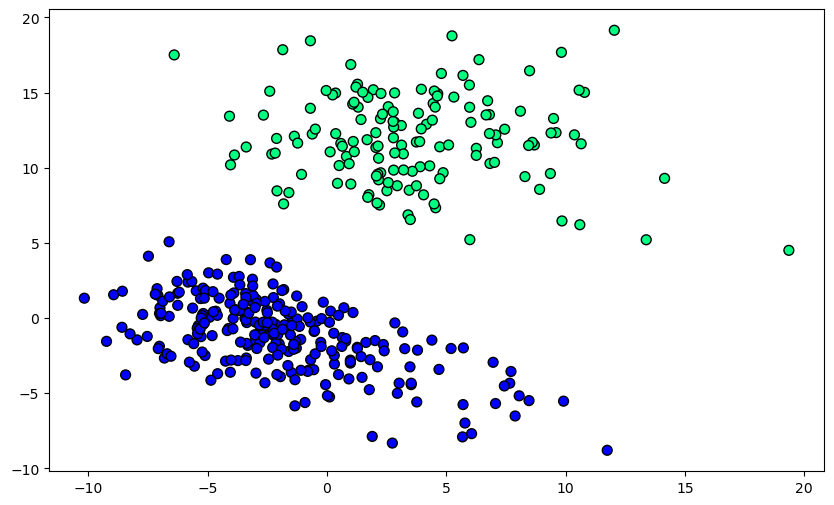

In [56]:

from sklearn.decomposition import PCA

# Assuming X_train and y_train are already defined
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Increase separation by adding a constant value to one class
X_train_pca[y_train == 1, 1] += 10# Shifts the second component of class 1

plt.figure(figsize=(10, 6))

# Plot the scatter plot with increased separation
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.show()

In [ ]:
# we write our own implementation of logistic regression through step function 
def perceptron_step(X,y):
    X=np.insert(X, 0, 1, axis=1)
    weights= np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,X_train.shape[0]);
        y_hat=step(np.dot(X[j], weights))
        weights= weights + lr*(y[j]-y_hat)*X[j]

    return weights[0], weights[1:]

In [15]:
# we define the step function
def step(z):
    if(z<0) : return 0
    else: return 1

In [16]:
intercept_step, coef_step= perceptron_step(X_train_pca,y_train)

In [17]:
intercept_step

-2.1000000000000005

In [18]:
coef_step

array([0.45597693, 0.86061397])

In [19]:
m= -(coef_step[0]/coef_step[1])
b= -(intercept_step/coef_step[1])

In [20]:
x_input_step= np.linspace(-20, 30, 100)
y_input_step= m*x_input_step +b

(-13.0, 20.0)

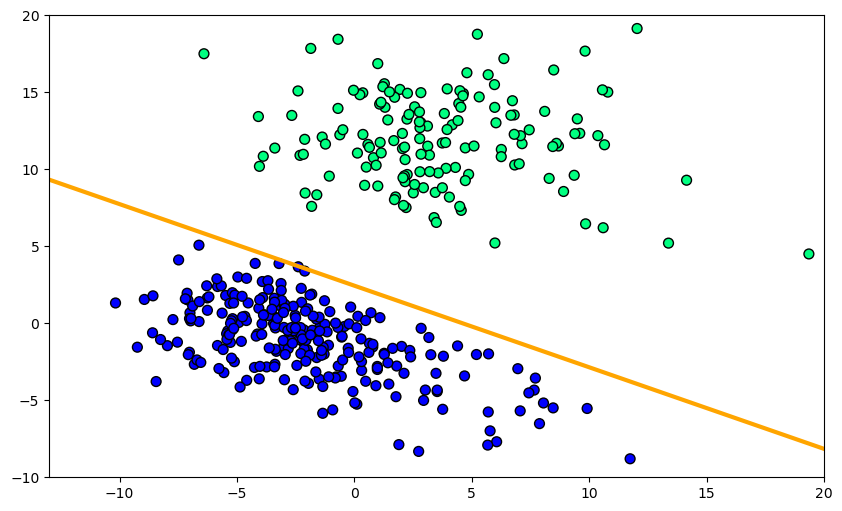

In [100]:
# we plot the graph for step function 
plt.figure(figsize=(10, 6))
plt.plot(x_input_step, y_input_step, color='orange', linewidth=3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter',edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

In [22]:
# we write our own implementation of logistic regression through sigmoid function 
def perceptron_sigmoid(X,y):
    X=np.insert(X, 0, 1, axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1

    for i in range(1500):
        j=np.random.randint(0,X.shape[0])
        y_hat=sigmoid(np.dot(X[j], weights))
        weights=weights+ lr*(y[j]-y_hat)*X[j]

    return weights[0], weights[1:]

In [23]:
# we define the sigmoid function 
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [24]:
intercept_sigmoid,coef_sigmoid= perceptron_sigmoid(X_train_pca,y_train)

In [25]:
intercept_sigmoid

-3.66123902366774

In [26]:
coef_sigmoid

array([0.54552545, 1.13695979])

In [27]:
m= -(coef_sigmoid[0]/coef_sigmoid[1])
b= -(intercept_sigmoid/coef_sigmoid[1])

In [28]:
x_input_sigmoid= np.linspace(-20,30,100)
y_input_sigmoid= m*x_input_sigmoid + b

(-13.0, 20.0)

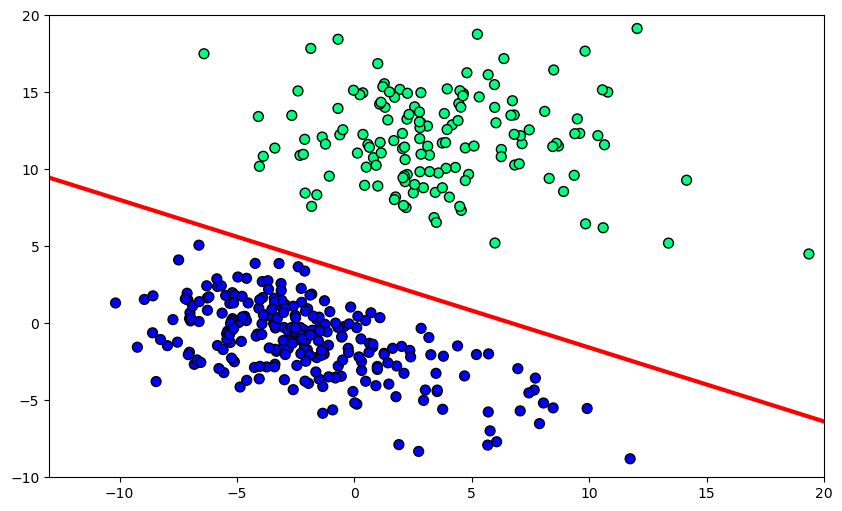

In [102]:
# we plot the graph for sigmoid fucntion 
plt.figure(figsize=(10,6))
plt.plot(x_input_sigmoid, y_input_sigmoid, color='red', linewidth=3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

(-13.0, 20.0)

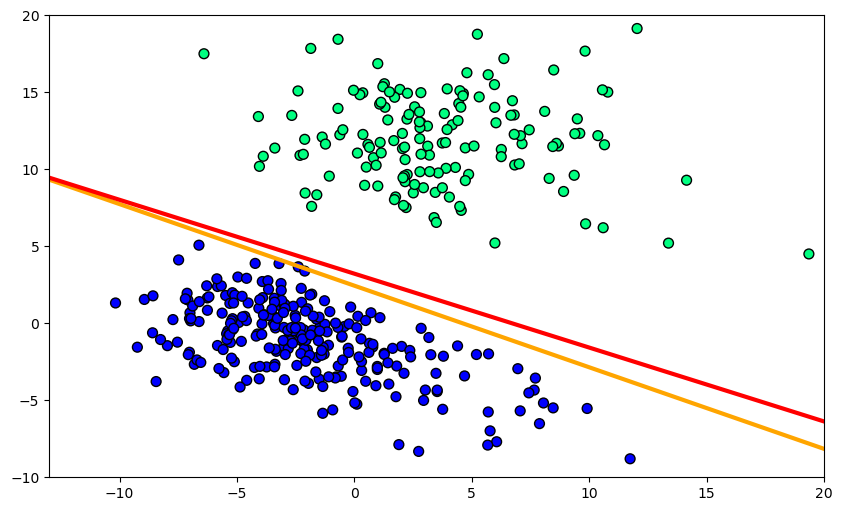

In [104]:
# we plot above 2 graphs for better comparison
plt.figure(figsize=(10,6))
plt.plot(x_input_step, y_input_step, color='orange', linewidth=3) # step
plt.plot(x_input_sigmoid, y_input_sigmoid, color='red', linewidth=3) # sigmoid 
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

In [31]:
# we use the inbuilt scikit learn library for logistic regression 
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X_train_pca,y_train)

LogisticRegression()

In [32]:
lor.coef_

array([[0.61111096, 1.36538188]])

In [33]:
lor.intercept_

array([-6.82659663])

In [34]:
m= -(lor.coef_[0][0]/lor.coef_[0][1])
b= -(lor.intercept_/lor.coef_[0][1])

In [35]:
x_input_lib = np.linspace(-20, 30, 100)
y_input_lib = m*x_input_lib+b

(-13.0, 20.0)

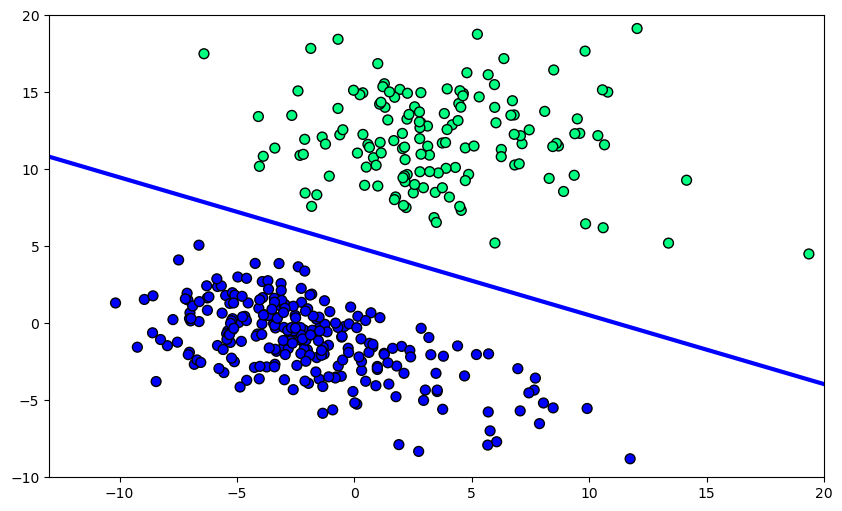

In [106]:
# we plot the graph for inbuilt logistic regression library
plt.figure(figsize=(10,6))
plt.plot(x_input_lib, y_input_lib, color='blue', linewidth=3) # library
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

(-13.0, 20.0)

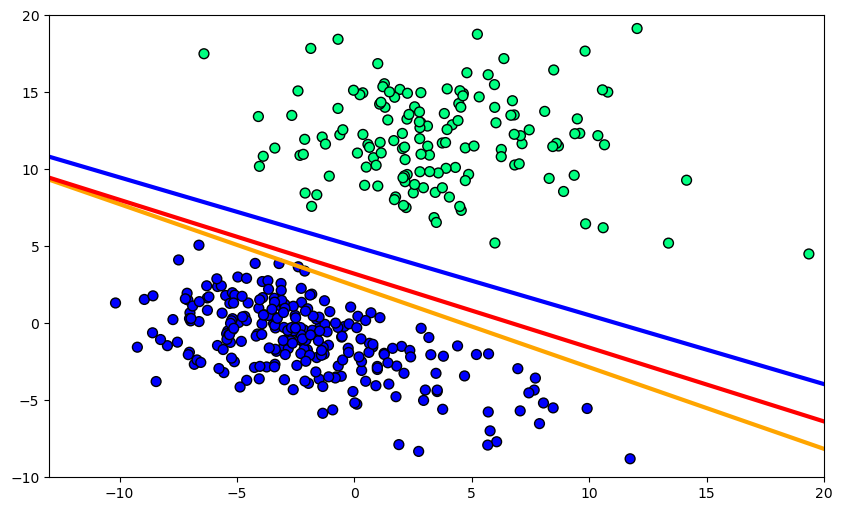

In [108]:
# we plot all three graphs together for comparison
plt.figure(figsize=(10,6))
plt.plot(x_input_step, y_input_step, color='orange', linewidth=3) # step
plt.plot(x_input_sigmoid, y_input_sigmoid, color='red', linewidth=3) # sigmoid 
plt.plot(x_input_lib, y_input_lib, color='blue', linewidth=3) # library
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

In [38]:
# we mofidy the sigmoid function using gradient descent 
def gd(X,y):

    X= np.insert(X,0,1, axis=1)
    weights= np.ones(X.shape[1])
    lr=0.5

    for i in range(5000):
        y_hat=sigmoid(np.dot(X, weights))
        weights= weights + lr*(np.dot((y- y_hat), X)/X.shape[0])

    return weights[1:], weights[0]

In [39]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [40]:
coef_gd, intercept_gd= gd(X_train_pca,y_train)

In [41]:
coef_gd

array([0.96204123, 1.6093809 ])

In [42]:
intercept_gd

-6.822150531466803

In [43]:
m=-(coef_gd[0]/coef_gd[1])
b=-(intercept_gd/coef_gd[1])

In [44]:
x_input_gd = np.linspace(-20,30,100)
y_input_gd = m*x_input_gd + b

(-13.0, 20.0)

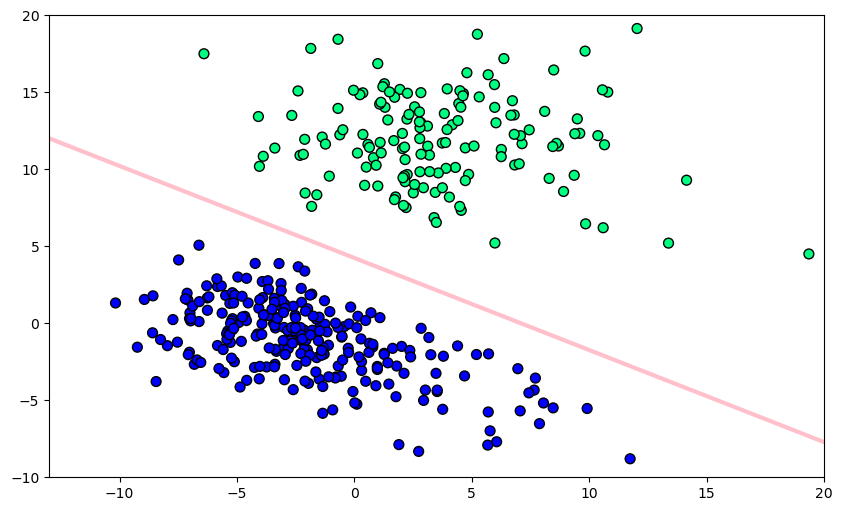

In [98]:
# we plot the modified version of sigmoid function 
plt.figure(figsize=(10,6))
plt.plot(x_input_gd, y_input_gd, color='pink', linewidth=3) # optimised sigmoid by gradient descent 
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

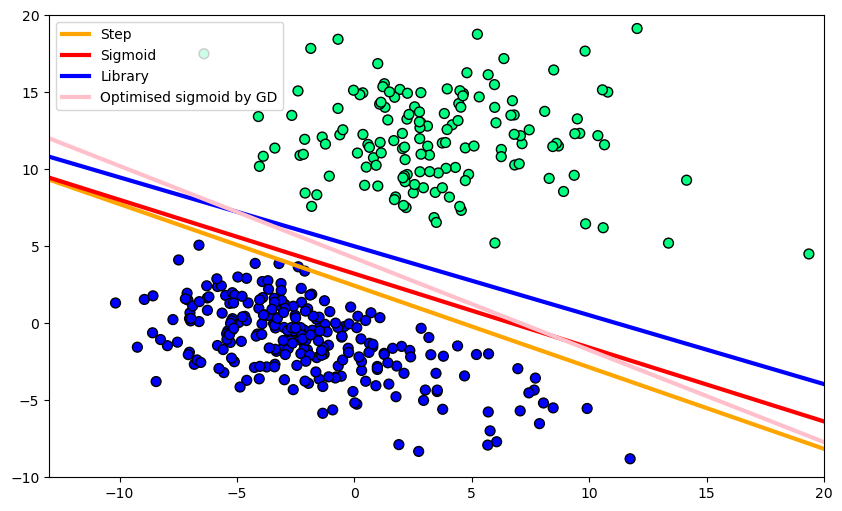

In [96]:
# we plot all four graphs for better comparison 
plt.figure(figsize=(10,6))
plt.plot(x_input_step, y_input_step, color='orange', linewidth=3 , label ="Step") # step
plt.plot(x_input_sigmoid, y_input_sigmoid, color='red', linewidth=3 , label ="Sigmoid") # sigmoid 
plt.plot(x_input_lib, y_input_lib, color='blue', linewidth=3, label ="Library") # library
plt.plot(x_input_gd, y_input_gd, color='pink', linewidth=3, label ="Optimised sigmoid by GD") # optimised sigmoid by gradient descent 
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)
plt.legend()
plt.show()

# here it can be noted that on using gradient descent on sigmoid function our output exactly overlaps with the inbuilt scikit learn library 